# Kaggle Digit Recognizer

## Problem statement


## Exploratory analysis
Firstly import all necessary libraries

In [12]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('input/train.csv')
eval_df = pd.read_csv('input/test.csv')

In [3]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Define target variable and create training and testing data sets.

In [4]:
target = 'label'
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=1)

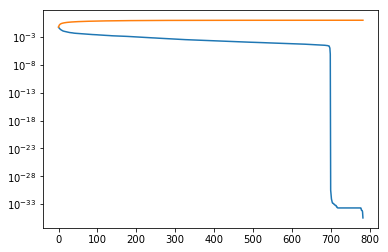

In [14]:
z_scaler = StandardScaler()

z_data = z_scaler.fit_transform(X_train)
pca_trafo = PCA().fit(z_data);

plt.semilogy(pca_trafo.explained_variance_ratio_);
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum());

#pca = PCA(n_components=3)
#pca_transform = pca.fit_transform(X_train)
#print pca.explained_variance_ratio_

In [ ]:
svc_param = [{'kernel': ['linear', 'rbf', 'sigmoid']
                 , 'gamma': [1e-3, 1e-4, 1e-5]
                 , 'C': np.arange(1000, 10000, 1000)}]

clf = GridSearchCV(estimator=SVC(cache_size=2000, decision_function_shape='ovr', random_state=1), cv=5, param_grid=svc_param)
clf.fit(X_train, y_train)

Fit a Support Vector Classifier and tune hyperparameters using GridSearch plus crossvalidation.

In [ ]:
print "Best estimator found by GridSearchCV: "
print clf.best_estimator_
print "with a score of: "
print clf.best_score_

Classification report:

In [ ]:
classification_report(y_test, y_pred)

Confusion matrix:

In [ ]:
confusion_matrix(y_test, y_pred)